In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\Srivalli\OneDrive\Desktop\sem 5\ml\lab3 eval\heart_v2.csv')

In [5]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [75]:
x=df.drop('heart disease',axis=1)
y=df['heart disease']

In [77]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier

class_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [79]:
class_rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [80]:
class_rf.oob_score_

0.656084656084656

In [81]:
class_rf.score(xtest,ytest)

0.654320987654321

In [113]:
ypred=class_rf.predict(xtest)

In [114]:
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.654320987654321

# grid

In [82]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [88]:
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [91]:
grid_search.fit(xtrain,ytrain)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [92]:
grid_search.best_score_

np.float64(0.6985815602836879)

In [93]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

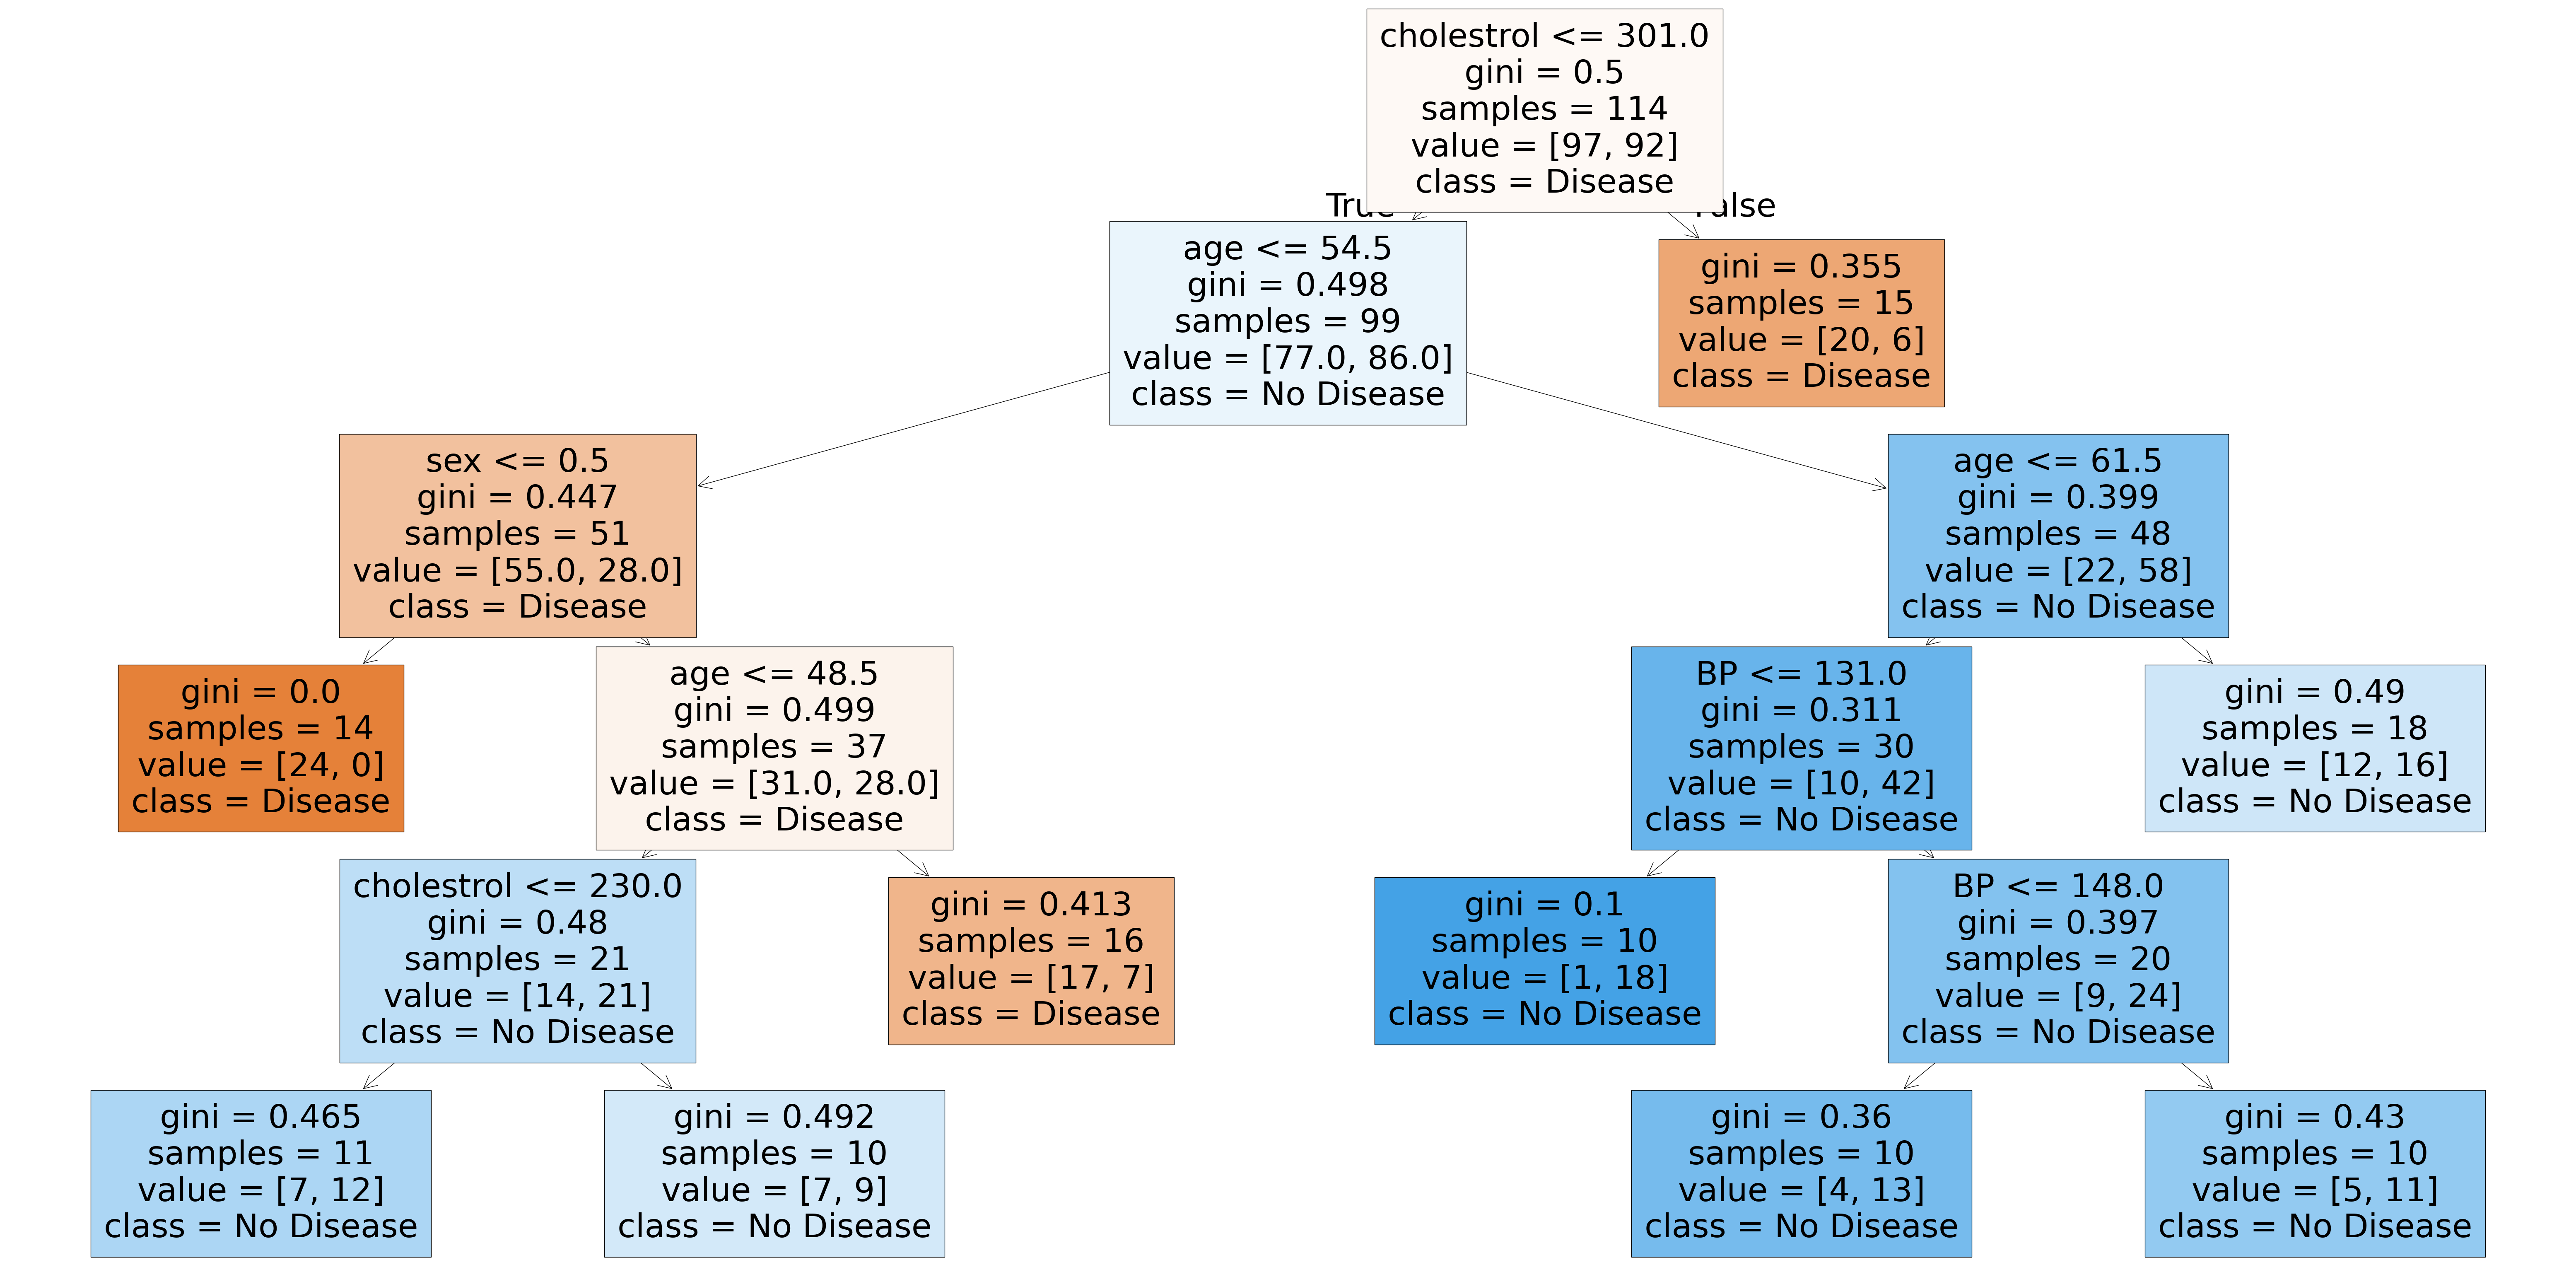

In [98]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=X.columns,class_names=['Disease','No Disease'],filled=True);

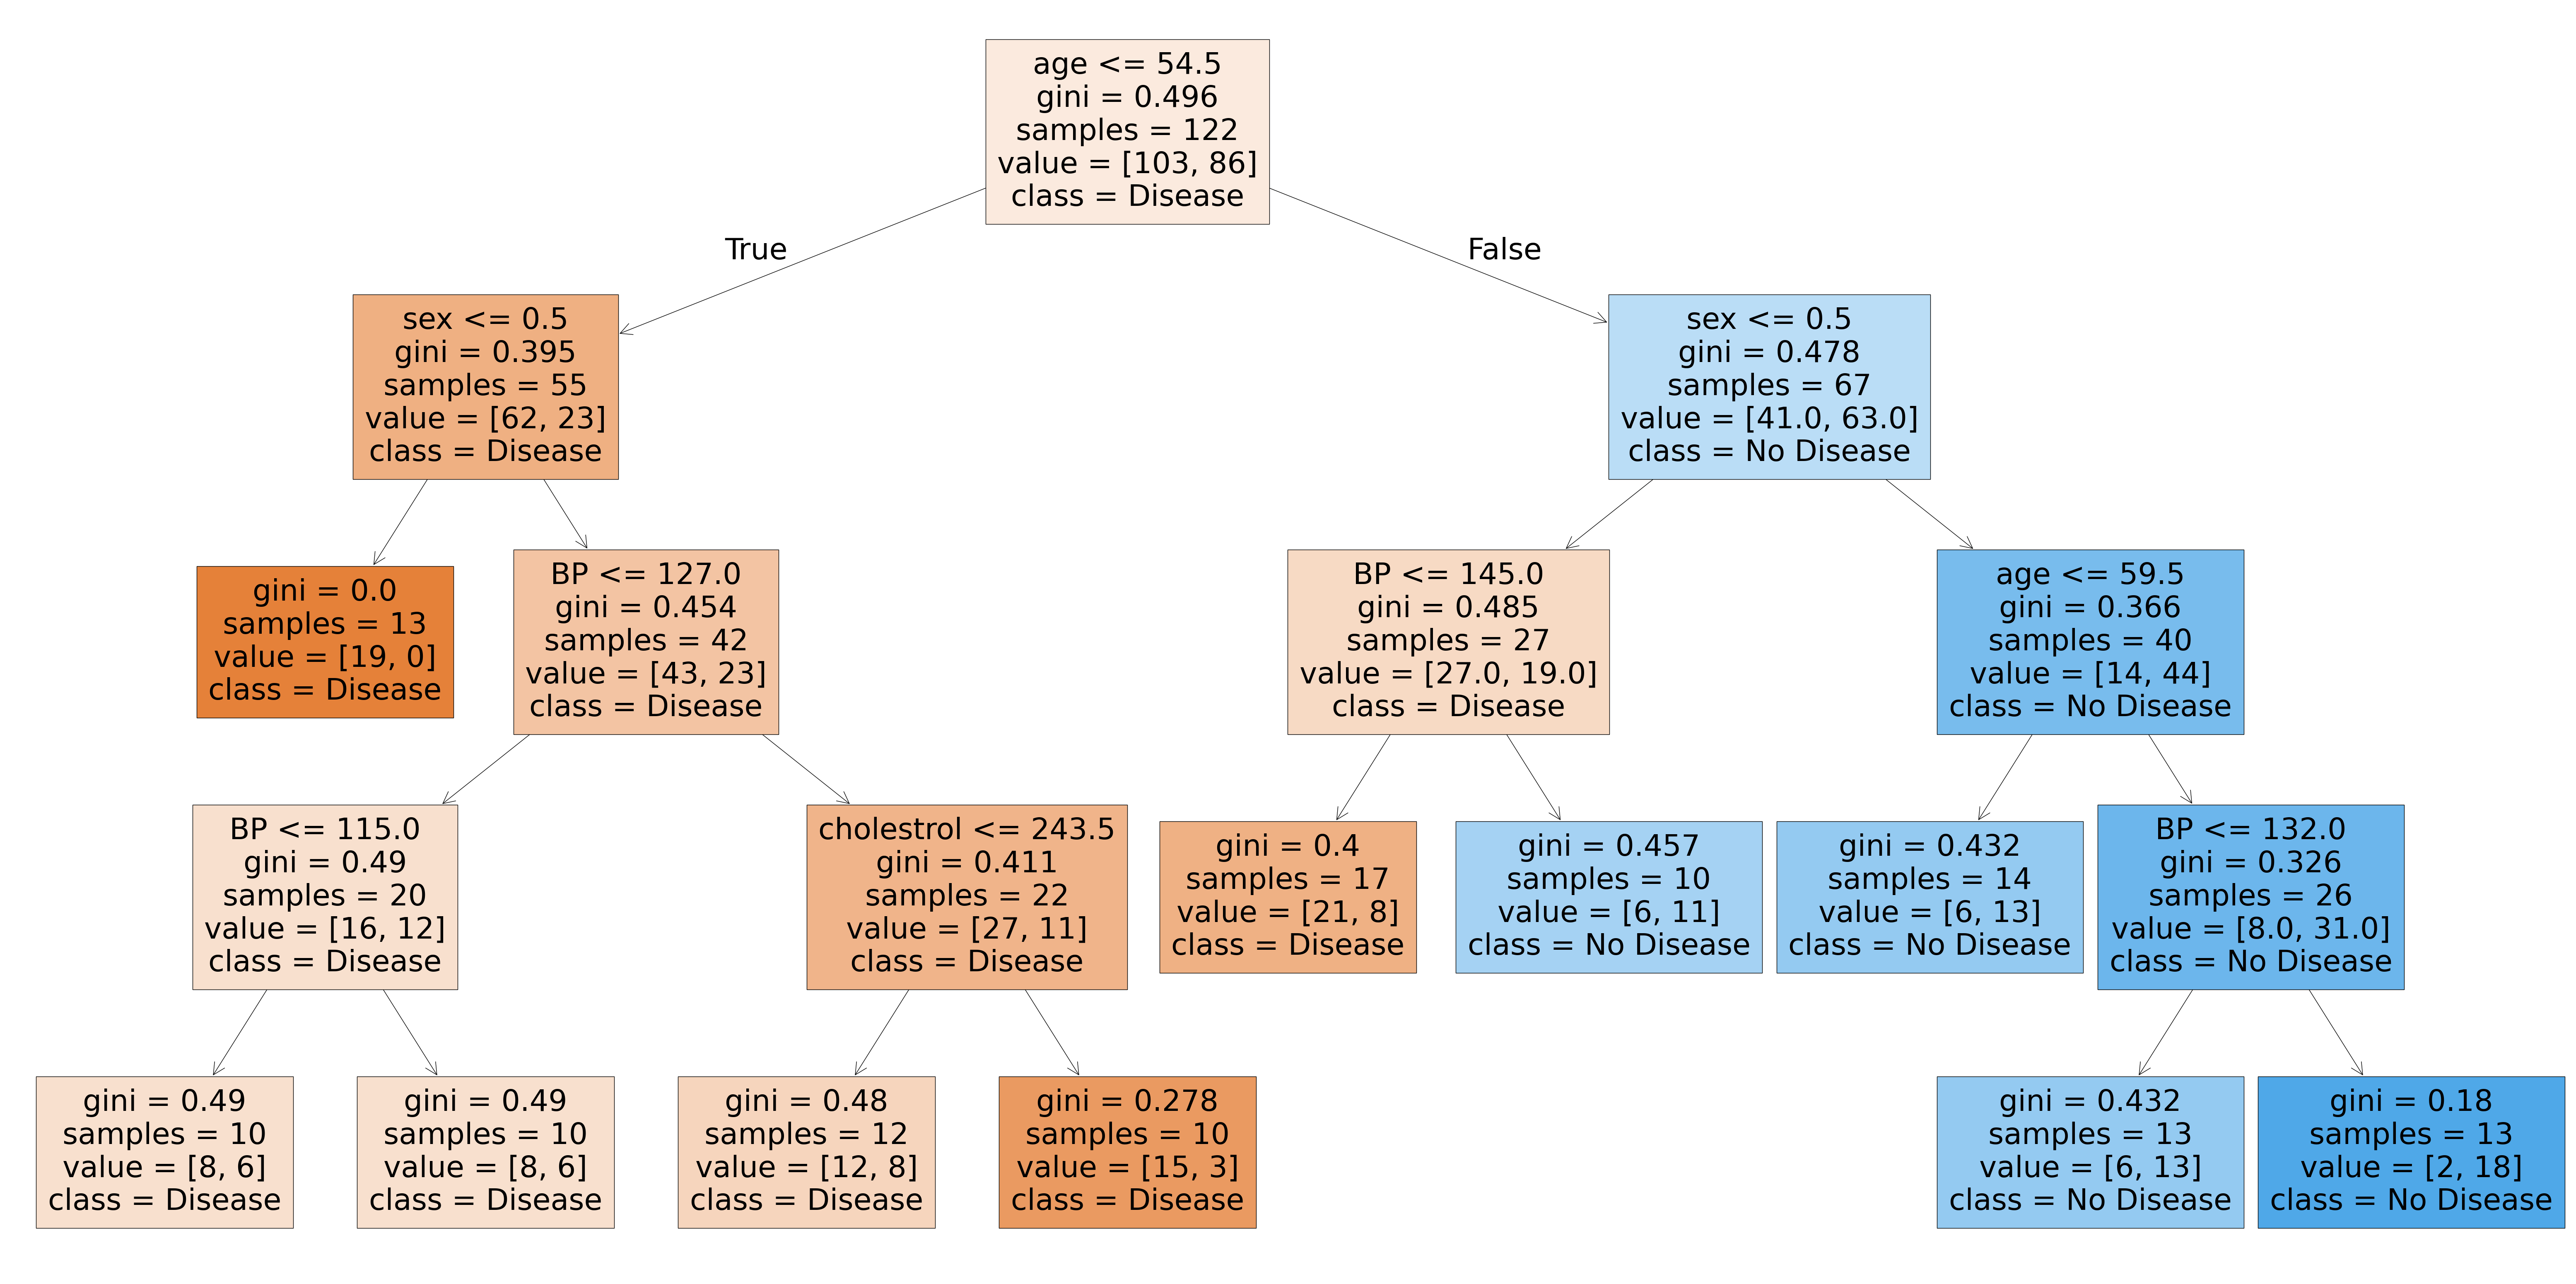

In [100]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],feature_names=X.columns,class_names=['Disease','No Disease'],filled=True);

In [102]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [104]:
new=pd.DataFrame({
    'Var':X.columns,
    'imp':rf_best.feature_importances_
    
})

In [107]:
new.sort_values(by='imp',ascending=False)

,Var,imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


C:\Users\Srivalli\AppData\Local\Temp\ipykernel_13676\479836387.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


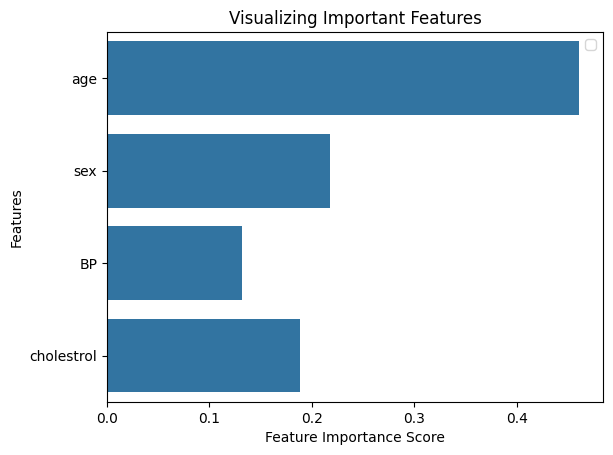

In [112]:
sns.barplot(y=new.Var,x=new.imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import confusion_matrix

ypred=rf_best.predict(xtest)
cm=confusion_matrix(ytest,ypred)
cm

array([[33, 16],
       [14, 18]])

Text(95.72222222222221, 0.5, 'Truth')

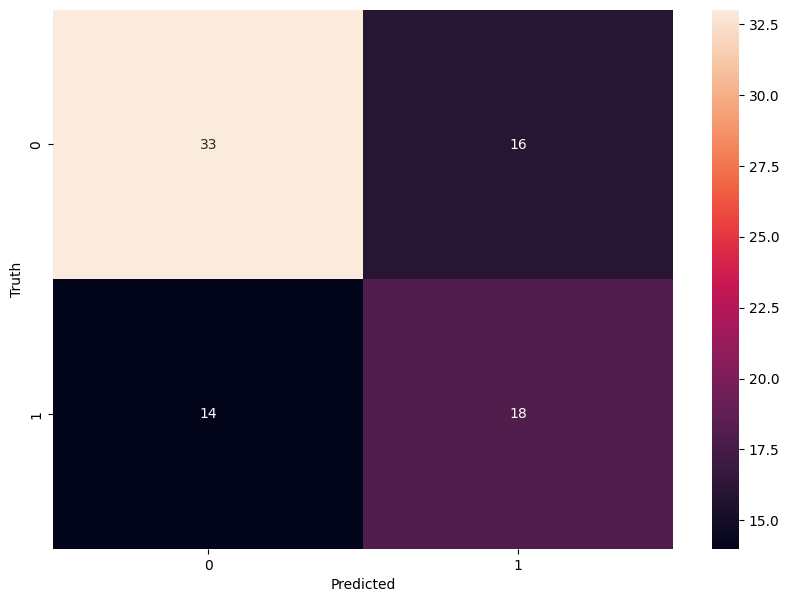

In [110]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')